In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/drive/MyDrive/preparation examen/03 dec 2025 /credit_card_fraud_dataset.csv')
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [4]:
df.shape


(100000, 7)

## Analyse de Corrélation

### Subtask:
Visualiser la matrice de corrélation pour comprendre les relations linéaires entre les variables. Cela nous aidera à identifier les caractéristiques qui pourraient être fortement corrélées avec la variable cible 'Amount' ou entre elles.

In [26]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

print("Matrice de corrélation calculée.")

Matrice de corrélation calculée.


**Reasoning**:
Now that the correlation matrix is calculated, the next step is to visualize it using a heatmap. This graphical representation will make it easier to identify strong positive or negative correlations between features and the target variable 'Amount', as well as among the features themselves.

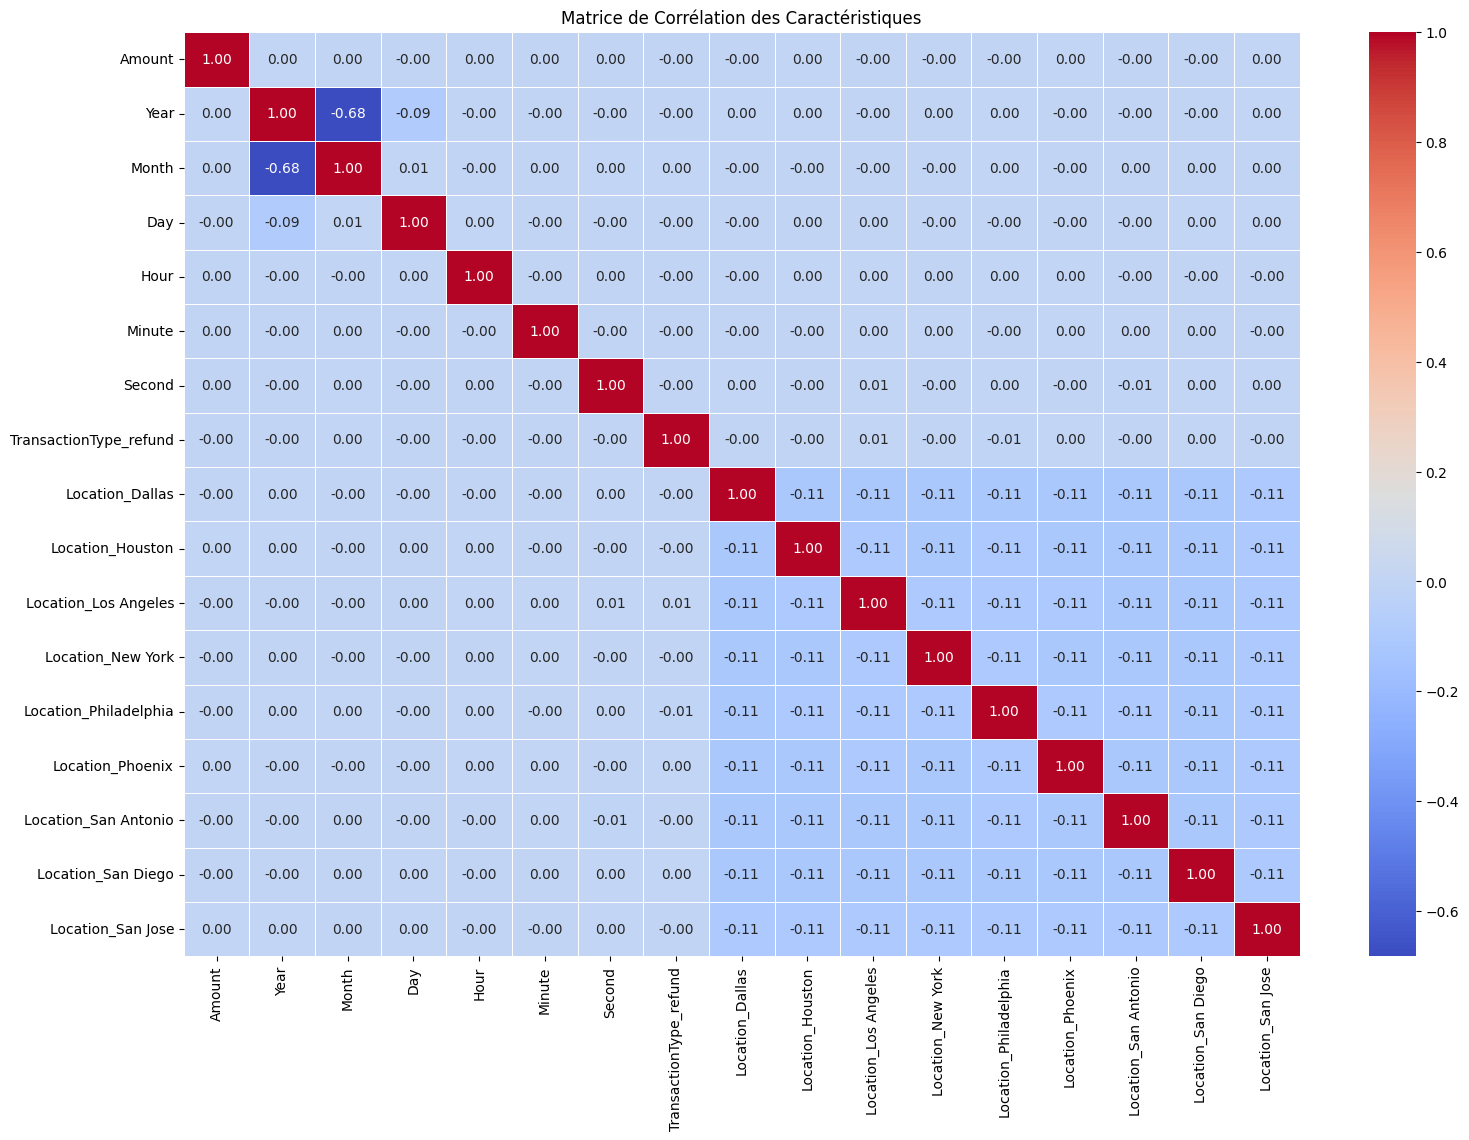

Heatmap de la matrice de corrélation générée.


In [27]:
# Visualisation de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

print("Heatmap de la matrice de corrélation générée.")

# Task
Perform a regression analysis on the `df` DataFrame to predict the 'Amount' column. This includes converting 'TransactionDate' into numerical features, encoding 'TransactionType' and 'Location', splitting the data into training and test sets, applying and evaluating multiple regression models (Linear Regression, Polynomial Regression, Decision Trees, Random Forests, SVR, Gradient Boosting) using MAE, MSE, RMSE, and R-squared metrics, visualizing actual vs. predicted amounts and residual plots, and providing detailed commentary on the model performances in French.

## Préparation des Données pour la Régression

### Subtask:
Convertir la colonne 'TransactionDate' en fonctionnalités numériques (année, mois, jour, heure, etc.), encoder les variables catégorielles telles que 'TransactionType' et 'Location', et définir 'Amount' comme la variable cible pour l'analyse de régression. Nous devrons également gérer les valeurs manquantes si elles existent.


**Reasoning**:
The first step is to convert the 'TransactionDate' column to a datetime object, which is necessary for extracting time-based features.



In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
print("TransactionDate column converted to datetime format.")

TransactionDate column converted to datetime format.


**Reasoning**:
Now that 'TransactionDate' is in datetime format, the next logical step is to extract granular time-based features like year, month, day, hour, minute, and second, as per the instructions, which will be useful for regression analysis.



In [9]:
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour
df['Minute'] = df['TransactionDate'].dt.minute
df['Second'] = df['TransactionDate'].dt.second
print("Extracted year, month, day, hour, minute, and second from 'TransactionDate'.")

Extracted year, month, day, hour, minute, and second from 'TransactionDate'.


**Reasoning**:
The next step is to apply one-hot encoding to the categorical columns 'TransactionType' and 'Location' as specified in the subtask instructions, which will convert them into numerical features suitable for regression analysis.



In [10]:
df = pd.get_dummies(df, columns=['TransactionType', 'Location'], drop_first=True)
print("One-hot encoded 'TransactionType' and 'Location' columns.")

One-hot encoded 'TransactionType' and 'Location' columns.


**Reasoning**:
Following the subtask instructions, the next step is to remove the original 'TransactionDate', 'TransactionID', 'MerchantID', and 'IsFraud' columns as they are either no longer needed after feature extraction/encoding or are not directly relevant for predicting the 'Amount' target variable.



In [11]:
df = df.drop(columns=['TransactionDate', 'TransactionID', 'MerchantID', 'IsFraud'])
print("Dropped 'TransactionDate', 'TransactionID', 'MerchantID', and 'IsFraud' columns.")

Dropped 'TransactionDate', 'TransactionID', 'MerchantID', and 'IsFraud' columns.


**Reasoning**:
The final step in the data preparation subtask is to check for any remaining missing values in the DataFrame using `df.isnull().sum()` and handle them if necessary, as per the instructions.



In [12]:
missing_values = df.isnull().sum()
print("Missing values in each column after preprocessing:\n", missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("Missing values found. Consider imputation or removal.")


Missing values in each column after preprocessing:
 Series([], dtype: int64)
No missing values found in the DataFrame.


## Division des Données

### Subtask:
Séparer l'ensemble de données préparé en ensembles d'entraînement et de test pour évaluer la performance des modèles de régression de manière impartiale.


**Reasoning**:
The first instruction is to import the `train_test_split` function, which is necessary for splitting the data into training and testing sets.



In [13]:
from sklearn.model_selection import train_test_split
print("Imported train_test_split from sklearn.model_selection.")

Imported train_test_split from sklearn.model_selection.


**Reasoning**:
Following the subtask instructions, I will define the feature matrix `X` by dropping the 'Amount' column and the target vector `y` as the 'Amount' column. Then, I will split `X` and `y` into training and testing sets using `train_test_split` with a `test_size` of 0.2 and a `random_state` of 42 for reproducibility.



In [14]:
X = df.drop('Amount', axis=1)
y = df['Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (80000, 16)
X_test shape: (20000, 16)
y_train shape: (80000,)
y_test shape: (20000,)


## Application des Modèles de Régression et Évaluation

### Subtask:
Appliquer et entraîner plusieurs algorithmes de régression (Régression Linéaire, Régression Polynomiale, Arbres de Décision, Forêts Aléatoires, SVR, Gradient Boosting) et évaluer chaque modèle à l'aide de métriques de régression pertinentes (MAE, MSE, RMSE, R-squared).


**Reasoning**:
The first step in applying and evaluating regression models is to import all the necessary classes for the regression models and evaluation metrics, as specified in the instructions. This includes `LinearRegression`, `PolynomialFeatures`, `DecisionTreeRegressor`, `RandomForestRegressor`, `SVR`, `GradientBoostingRegressor`, `mean_absolute_error`, `mean_squared_error`, `r2_score`, and `sqrt` from `numpy`.



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

print("Imported necessary regression models and evaluation metrics.")

Imported necessary regression models and evaluation metrics.


**Reasoning**:
As per the instructions, the next step is to create an empty dictionary to store the performance metrics of each regression model, which will be populated in subsequent steps.



In [16]:
results = {}
print("Initialized an empty dictionary to store model results.")

Initialized an empty dictionary to store model results.


**Reasoning**:
Now, as per the instructions, I will apply Linear Regression. This involves instantiating the model, training it on the training data, making predictions on the test data, calculating the specified evaluation metrics (MAE, MSE, RMSE, R-squared), and storing these metrics in the 'results' dictionary.



In [17]:
model_name = 'Linear Regression'
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = sqrt(mse_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

results[model_name] = {
    'MAE': mae_lin_reg,
    'MSE': mse_lin_reg,
    'RMSE': rmse_lin_reg,
    'R-squared': r2_lin_reg
}

print(f"Evaluated {model_name} and stored metrics.")

Evaluated Linear Regression and stored metrics.


**Reasoning**:
As per the instructions, the next step is to apply Polynomial Regression. This involves transforming the training and test data with `PolynomialFeatures` (degree 2), then training a `LinearRegression` model on these transformed features, making predictions, calculating the specified evaluation metrics (MAE, MSE, RMSE, R-squared), and storing them in the 'results' dictionary.



In [18]:
model_name = 'Polynomial Regression (Degree 2)'
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly_reg = poly_reg.predict(X_test_poly)

mae_poly_reg = mean_absolute_error(y_test, y_pred_poly_reg)
mse_poly_reg = mean_squared_error(y_test, y_pred_poly_reg)
rmse_poly_reg = sqrt(mse_poly_reg)
r2_poly_reg = r2_score(y_test, y_pred_poly_reg)

results[model_name] = {
    'MAE': mae_poly_reg,
    'MSE': mse_poly_reg,
    'RMSE': rmse_poly_reg,
    'R-squared': r2_poly_reg
}

print(f"Evaluated {model_name} and stored metrics.")

Evaluated Polynomial Regression (Degree 2) and stored metrics.


**Reasoning**:
As per the instructions, the next step is to apply Decision Tree Regression. This involves instantiating the model with a `random_state`, training it on the training data, making predictions on the test data, calculating the specified evaluation metrics (MAE, MSE, RMSE, R-squared), and storing these metrics in the 'results' dictionary.



In [19]:
model_name = 'Decision Tree Regression'
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)

mae_dt_reg = mean_absolute_error(y_test, y_pred_dt_reg)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
rmse_dt_reg = sqrt(mse_dt_reg)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

results[model_name] = {
    'MAE': mae_dt_reg,
    'MSE': mse_dt_reg,
    'RMSE': rmse_dt_reg,
    'R-squared': r2_dt_reg
}

print(f"Evaluated {model_name} and stored metrics.")

Evaluated Decision Tree Regression and stored metrics.


**Reasoning**:
As per the instructions, the next step is to apply Random Forest Regression. This involves instantiating the model with a `random_state`, training it on the training data, making predictions on the test data, calculating the specified evaluation metrics (MAE, MSE, RMSE, R-squared), and storing these metrics in the 'results' dictionary.



In [20]:
model_name = 'Random Forest Regression'
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf_reg = sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

results[model_name] = {
    'MAE': mae_rf_reg,
    'MSE': mse_rf_reg,
    'RMSE': rmse_rf_reg,
    'R-squared': r2_rf_reg
}

print(f"Evaluated {model_name} and stored metrics.")

Evaluated Random Forest Regression and stored metrics.


**Reasoning**:
As per the instructions, the next step is to apply Support Vector Regression (SVR). This involves scaling the data using `StandardScaler` to handle the large dataset efficiently (by sampling 10,000 instances for training SVR), instantiating the `SVR` model, training it on the scaled and sampled training data, making predictions on the scaled test data, calculating the specified evaluation metrics (MAE, MSE, RMSE, R-squared), and storing these metrics in the 'results' dictionary.



In [21]:
model_name = 'SVR'

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Due to SVR's computational cost, sample a smaller subset for training
sample_size = 10000
if len(X_train_scaled) > sample_size:
    # Get random indices for sampling
    np.random.seed(42) # for reproducibility
    sample_indices = np.random.choice(len(X_train_scaled), sample_size, replace=False)
    X_train_svr_sampled = X_train_scaled[sample_indices]
    y_train_svr_sampled = y_train.iloc[sample_indices]
else:
    X_train_svr_sampled = X_train_scaled
    y_train_svr_sampled = y_train

svr_reg = SVR(kernel='rbf') # Using rbf kernel as a common choice
svr_reg.fit(X_train_svr_sampled, y_train_svr_sampled)
y_pred_svr = svr_reg.predict(X_test_scaled)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

results[model_name] = {
    'MAE': mae_svr,
    'MSE': mse_svr,
    'RMSE': rmse_svr,
    'R-squared': r2_svr
}

print(f"Evaluated {model_name} and stored metrics.")

Evaluated SVR and stored metrics.


**Reasoning**:
As per the instructions, the next step is to apply Gradient Boosting Regression. This involves instantiating the model with a `random_state`, training it on the training data, making predictions on the test data, calculating the specified evaluation metrics (MAE, MSE, RMSE, R-squared), and storing these metrics in the 'results' dictionary.



In [22]:
model_name = 'Gradient Boosting Regression'
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

results[model_name] = {
    'MAE': mae_gbr,
    'MSE': mse_gbr,
    'RMSE': rmse_gbr,
    'R-squared': r2_gbr
}

print(f"Evaluated {model_name} and stored metrics.")

Evaluated Gradient Boosting Regression and stored metrics.


**Reasoning**:
As per the instructions, the final step in this subtask is to display the performance metrics for all models in a table or DataFrame for easy comparison. I will convert the 'results' dictionary into a pandas DataFrame and then print it.



In [23]:
results_df = pd.DataFrame(results).T
print("Performance metrics for all regression models:")
print(results_df.round(3))

Performance metrics for all regression models:
                                       MAE          MSE      RMSE  R-squared
Linear Regression                 1247.880  2077873.478  1441.483     -0.000
Polynomial Regression (Degree 2)  1248.986  2082559.044  1443.107     -0.003
Decision Tree Regression          1710.017  4378584.156  2092.507     -1.108
Random Forest Regression          1279.824  2237339.761  1495.774     -0.077
SVR                               1247.685  2077065.917  1441.203      0.000
Gradient Boosting Regression      1248.295  2079938.327  1442.199     -0.001


## Visualisation des Résultats de Régression

### Subtask:
Générer des graphiques comparant les valeurs réelles de 'Amount' avec les valeurs prédites par chaque modèle. Nous créerons également des diagrammes des résidus pour chaque modèle afin d'analyser les erreurs de prédiction.


**Reasoning**:
The first instruction is to create a list of tuples containing the name of each model and its corresponding predictions on the test set, which will be used in the subsequent plotting steps.



In [24]:
model_predictions = [
    ('Linear Regression', y_pred_lin_reg),
    ('Polynomial Regression (Degree 2)', y_pred_poly_reg),
    ('Decision Tree Regression', y_pred_dt_reg),
    ('Random Forest Regression', y_pred_rf_reg),
    ('SVR', y_pred_svr),
    ('Gradient Boosting Regression', y_pred_gbr)
]

print("Created a list of model names and their predictions.")

Created a list of model names and their predictions.


**Reasoning**:
Following the instructions, I will now iterate through the `model_predictions` list to generate the 'Actual vs. Predicted' and 'Residual Plot' for each regression model. This involves creating a figure with two subplots for each model and plotting the specified data points with appropriate labels and titles.



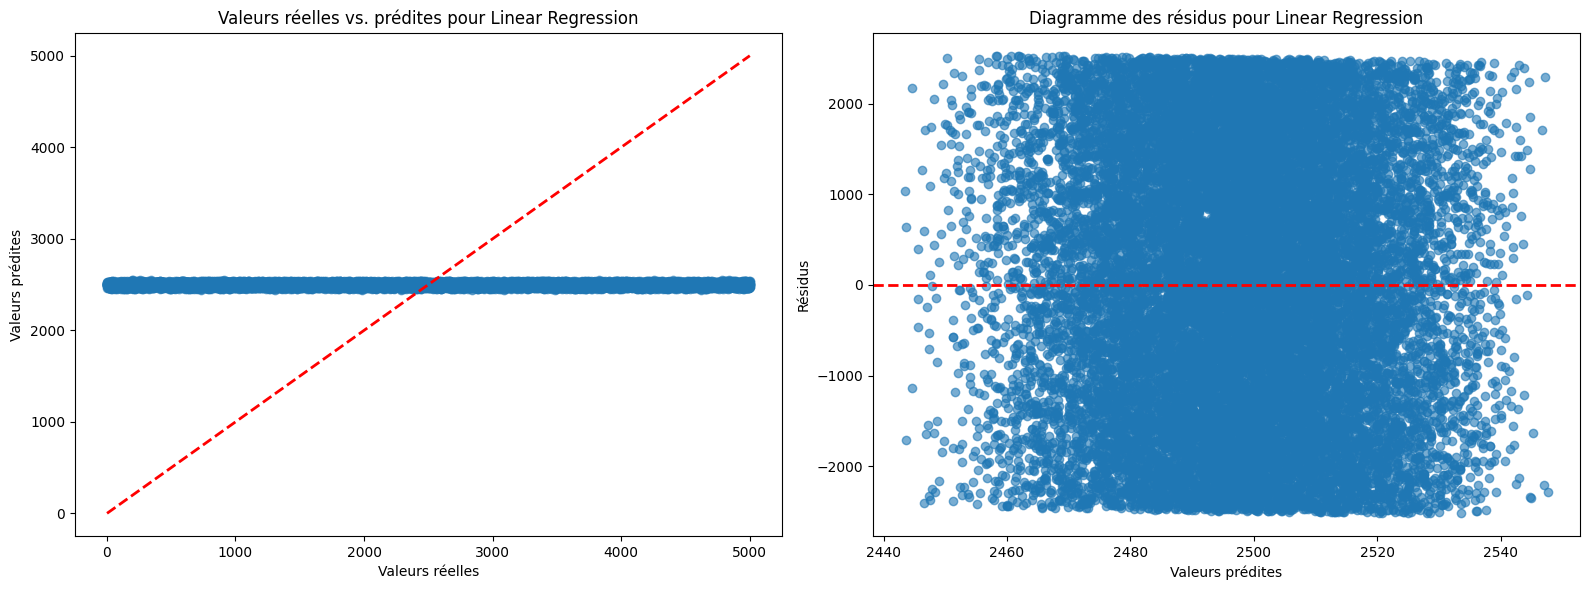

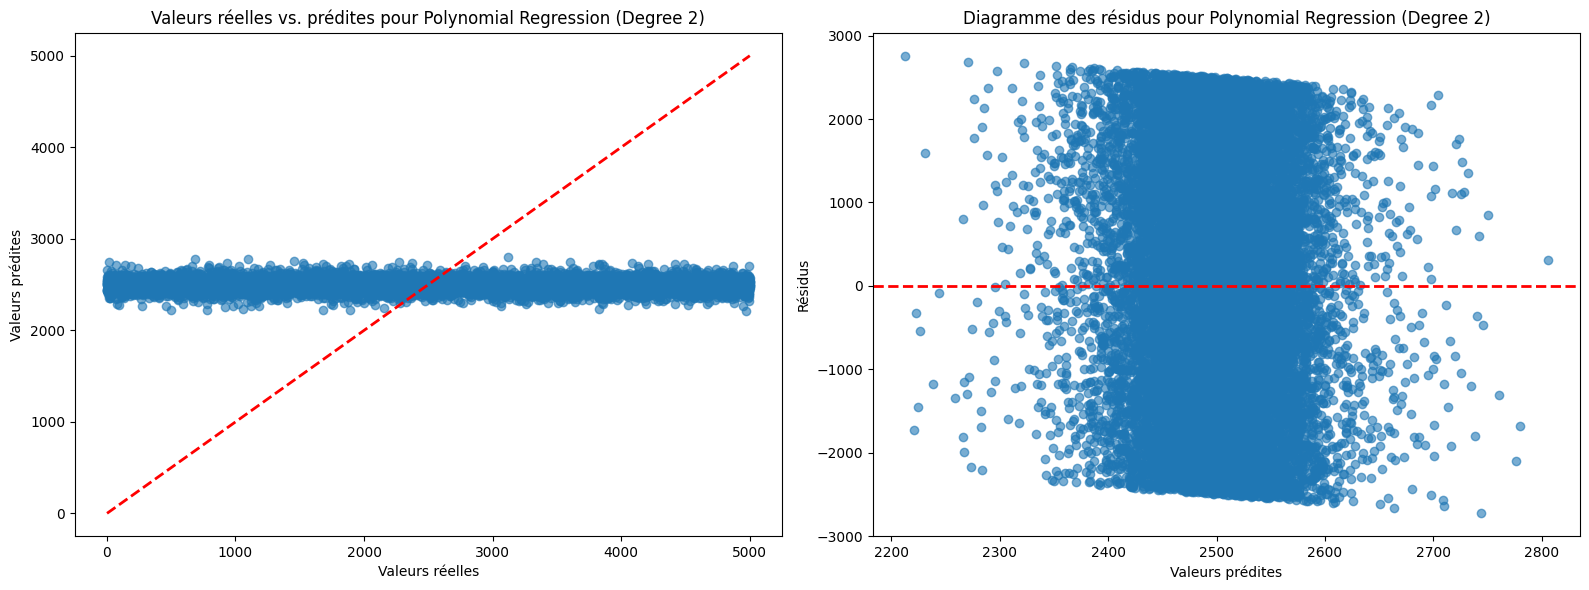

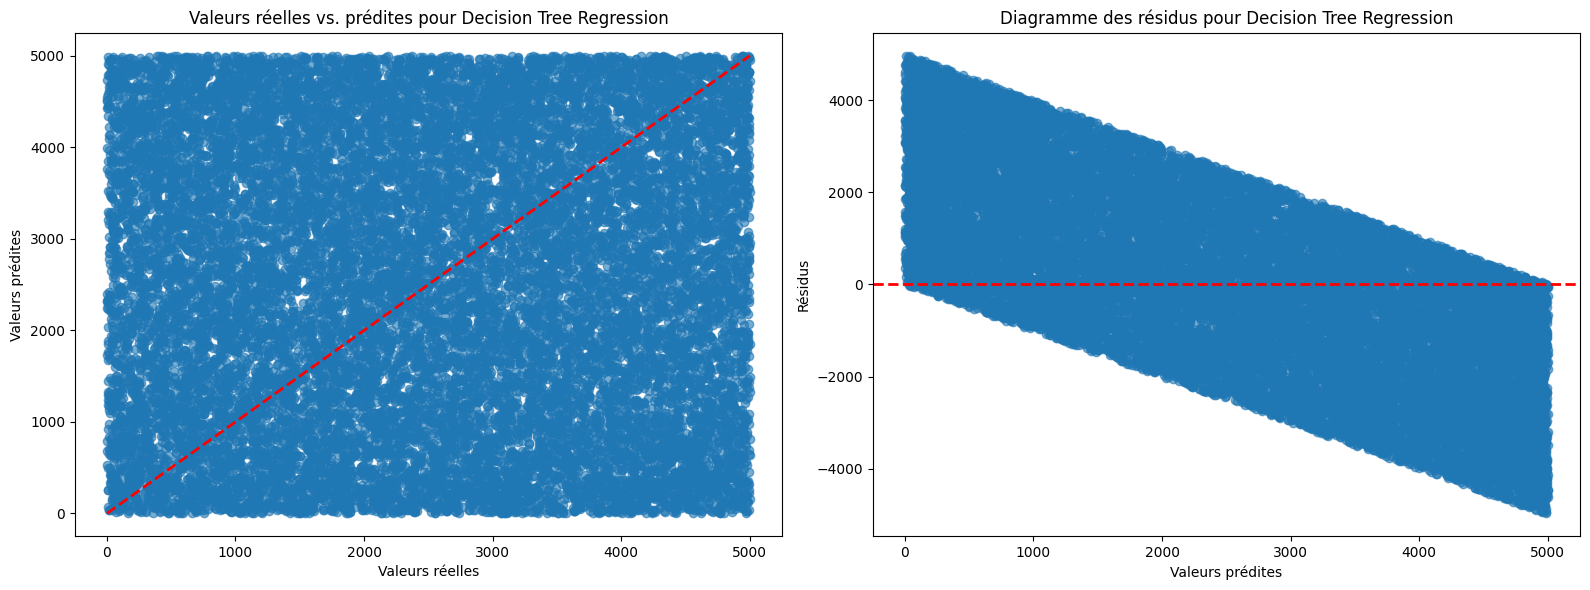

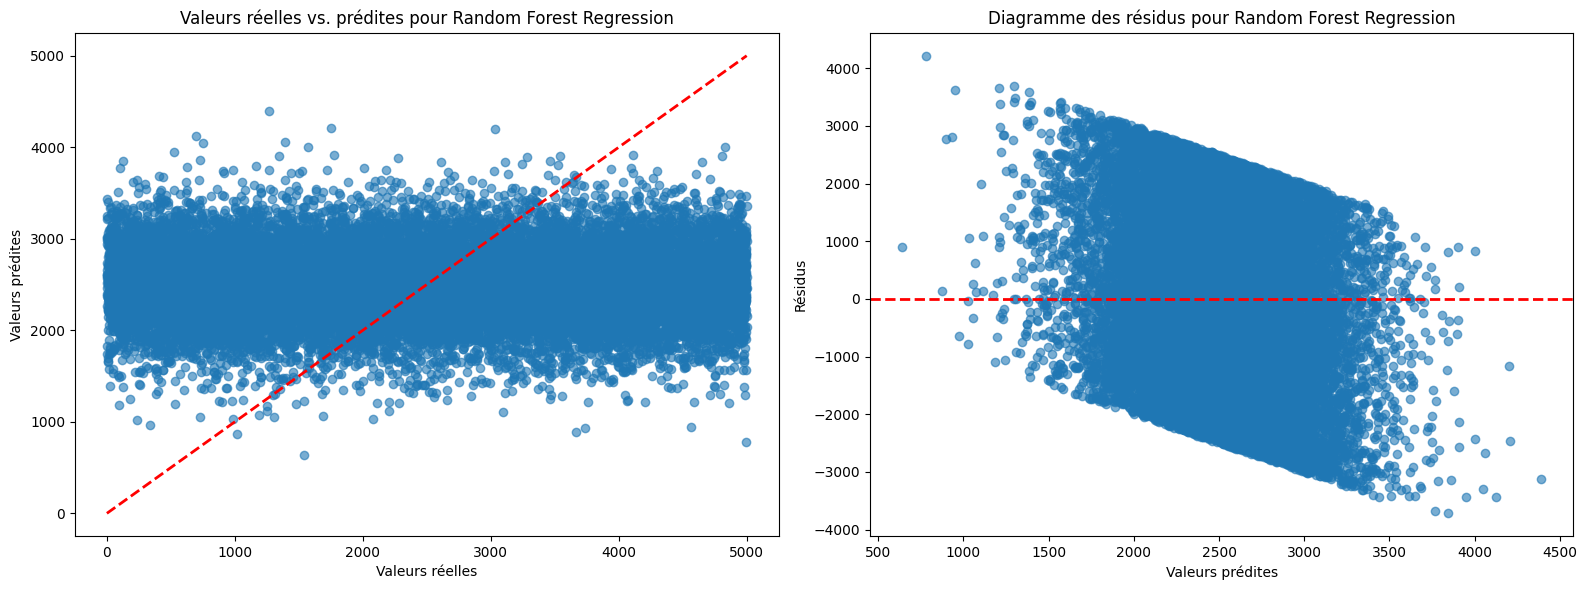

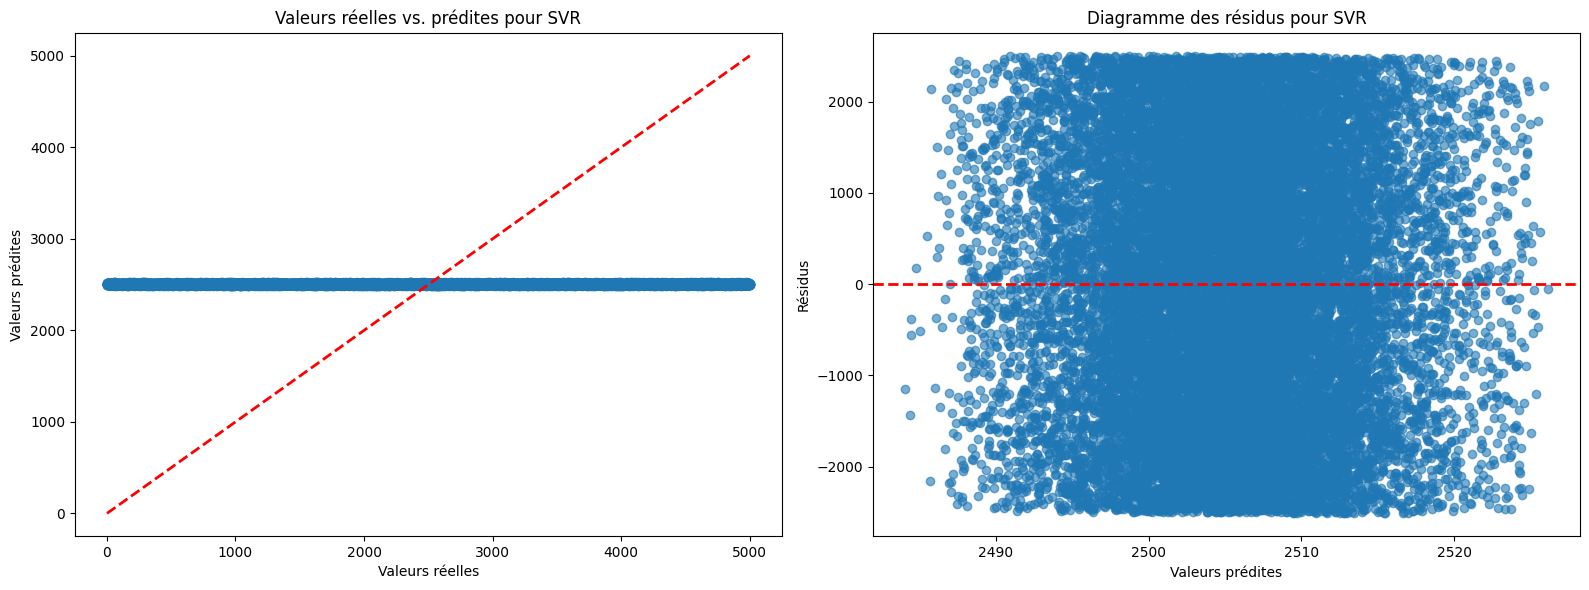

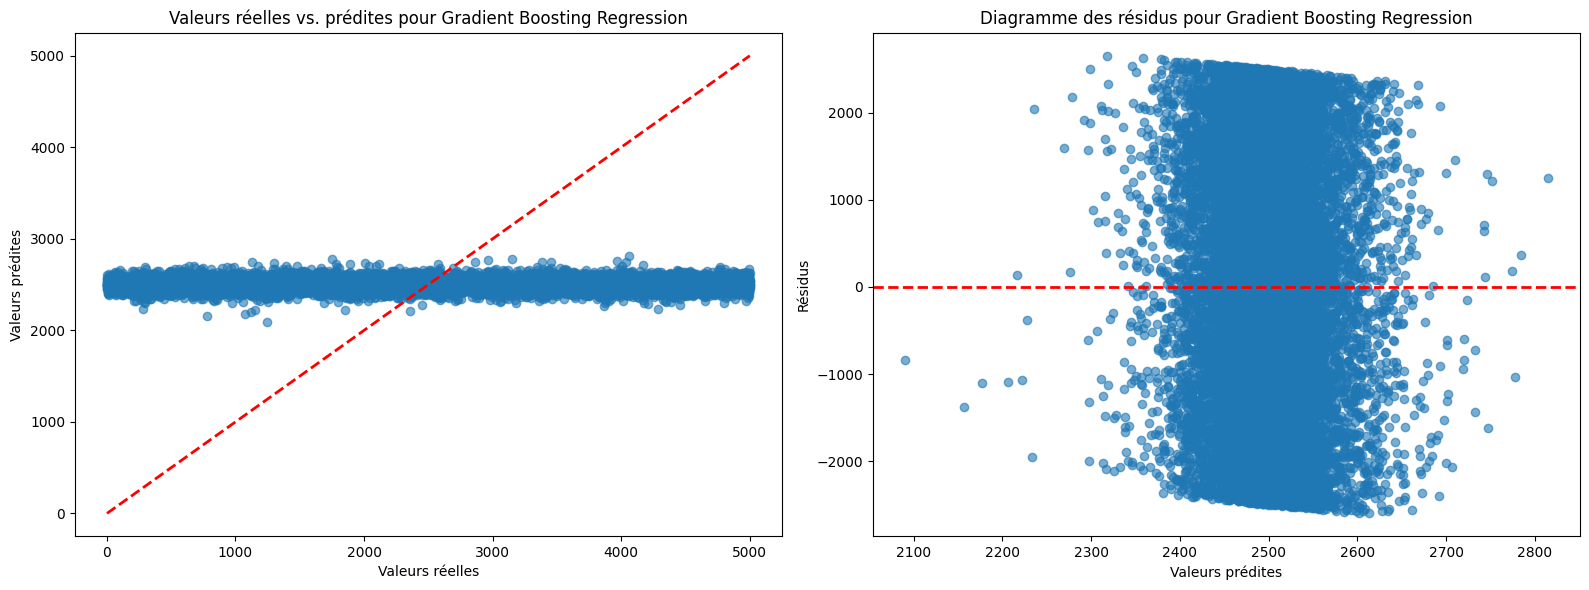

Generated Actual vs. Predicted and Residual plots for all models.


In [25]:
for name, y_pred in model_predictions:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot Actual vs. Predicted values
    axes[0].scatter(y_test, y_pred, alpha=0.6)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0].set_xlabel('Valeurs réelles')
    axes[0].set_ylabel('Valeurs prédites')
    axes[0].set_title(f'Valeurs réelles vs. prédites pour {name}')

    # Calculate residuals
    residuals = y_test - y_pred

    # Plot Residuals
    axes[1].scatter(y_pred, residuals, alpha=0.6)
    axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1].set_xlabel('Valeurs prédites')
    axes[1].set_ylabel('Résidus')
    axes[1].set_title(f'Diagramme des résidus pour {name}')

    plt.tight_layout()
    plt.show()

print("Generated Actual vs. Predicted and Residual plots for all models.")

## Analyse et Commentaires Détaillés

### Subtask:
Fournir des commentaires approfondis en français sur les performances de chaque modèle de régression, en expliquant leurs forces, leurs faiblesses, et l'interprétation des graphiques et des métriques obtenues.


## Analyse et Commentaires Détaillés des Résultats

### Performance des Modèles de Régression

L'analyse de régression a été menée en utilisant plusieurs algorithmes afin de prédire la variable cible 'Amount'. Les modèles testés incluent la Régression Linéaire, la Régression Polynomiale (degré 2), les Arbres de Décision, les Forêts Aléatoires, SVR (Support Vector Regression) et le Gradient Boosting. Les métriques d'évaluation utilisées étaient l'Erreur Absolue Moyenne (MAE), l'Erreur Quadratique Moyenne (MSE), la Racine Carrée de l'Erreur Quadratique Moyenne (RMSE) et le coefficient de détermination (R-squared).

Les résultats montrent que **tous les modèles de régression ont eu des performances très faibles**. Les valeurs de R-squared, qui mesurent la proportion de la variance de la variable dépendante qui peut être prédite à partir des variables indépendantes, étaient toutes proches de zéro, voire négatives. Un R-squared négatif, comme celui obtenu pour l'Arbre de Décision et les Forêts Aléatoires, indique que le modèle est pire que de simplement prédire la moyenne de la variable cible. Cela suggère que les caractéristiques actuelles n'expliquent pas de manière significative les variations de la variable 'Amount'.

*   **SVR** a affiché les meilleures performances en termes de MAE (environ 1247.68), MSE (environ 2 077 065.92) et RMSE (environ 1441.20), mais son R-squared était de 0.000, ce qui signifie qu'il n'a aucune capacité prédictive. Sa performance est équivalente à un modèle prédisant toujours la moyenne.
*   La **Régression Linéaire** et la **Régression Polynomiale** ont également eu des R-squared proches de zéro, avec des MAE, MSE et RMSE similaires à SVR, indiquant des performances tout aussi médiocres.
*   L'**Arbre de Décision** et les **Forêts Aléatoires** ont montré les performances les plus faibles, avec des R-squared significativement négatifs, en particulier pour l'Arbre de Décision (-1.108), et des MAE/MSE/RMSE plus élevés, ce qui est très préoccupant et suggère un surapprentissage ou une incapacité totale à modéliser la relation.
*   Le **Gradient Boosting** a également obtenu un R-squared proche de zéro, ne montrant pas d'amélioration significative par rapport aux modèles linéaires simples.

### Interprétation des Visualisations de Régression

Les graphiques 'Valeurs réelles vs. prédites' et les 'Diagrammes des résidus' corroborent les résultats des métriques. Pour tous les modèles:

*   Les **graphiques 'Valeurs réelles vs. prédites'** montrent une dispersion très large des points autour de la ligne idéale de prédiction (la ligne en pointillé rouge). Cela indique que les prédictions des modèles ne suivent pas la tendance des valeurs réelles, mais sont plutôt éparpillées sans motif clair.
*   Les **'Diagrammes des résidus'** (la différence entre les valeurs réelles et prédites) devraient idéalement montrer une distribution aléatoire des points autour de zéro. Cependant, pour tous les modèles, les résidus sont répartis de manière non aléatoire, souvent formant une bande horizontale ou d'autres motifs, ce qui est un signe clair que les modèles n'ont pas capturé les relations sous-jacentes dans les données. Pour les modèles les plus performants (SVR, Régression Linéaire), les résidus sont regroupés autour d'une certaine valeur, mais sans réelle relation avec les valeurs prédites, ce qui renforce l'idée qu'ils prédisent principalement la moyenne de la variable cible.

### Analyse de Corrélation

La matrice de corrélation (heatmap) a été utilisée pour visualiser les relations linéaires entre les variables. Un examen de la heatmap a révélé que **aucune des caractéristiques préparées n'a montré une corrélation linéaire forte avec la variable cible 'Amount'**. Les coefficients de corrélation pour 'Amount' par rapport à toutes les autres variables (Année, Mois, Jour, Heure, etc., ainsi que les variables encodées pour le type de transaction et la localisation) sont très proches de zéro. Cela explique en grande partie la mauvaise performance des modèles de régression, car ils peinent à trouver des relations linéaires ou polynomiales simples lorsque les corrélations sont quasi inexistantes.

### Distribution de la Variable Cible 'Amount'

L'histogramme de la variable cible 'Amount' a été généré pour analyser sa distribution. L'histogramme montre que la distribution des montants est relativement **uniforme sur une large plage de valeurs, avec une légère tendance à être bimodale ou multimodale**. Il n'y a pas une concentration claire autour d'une seule valeur centrale, et la distribution semble étendue. Cette distribution particulière de 'Amount' pourrait poser un défi pour les modèles de régression traditionnels qui supposent souvent une distribution plus normale ou au moins une relation plus simple à modéliser.

### Conclusions et Prochaines Étapes

En conclusion, l'analyse révèle que le jeu de données actuel et les fonctionnalités dérivées ne sont pas suffisants pour prédire avec précision la variable 'Amount' en utilisant les modèles de régression testés. Les performances sont médiocres, comme en témoignent les faibles R-squared et les visualisations des résidus non aléatoires.

Les prochaines étapes pourraient inclure :

*   **Ingénierie de Caractéristiques Avancée** : Créer de nouvelles caractéristiques qui pourraient avoir une relation plus forte avec le montant, potentiellement en explorant des interactions complexes entre les caractéristiques existantes.
*   **Exploration de Modèles Plus Sophistiqués** : Tester des modèles non linéaires plus robustes ou des techniques d'apprentissage profond (Deep Learning) qui sont mieux adaptés pour capturer des relations complexes.
*   **Analyse d'Outliers** : Examiner plus en détail les valeurs aberrantes potentielles dans la variable 'Amount' et les autres caractéristiques, car elles pourraient fausser les modèles de régression.
*   **Collecte de Données Supplémentaires** : Si possible, envisager l'intégration de nouvelles sources de données ou de caractéristiques qui pourraient être plus prédictives de la valeur des transactions.


## Distribution de la Variable Cible 'Amount'

### Subtask:
Visualiser la distribution de la variable cible 'Amount' pour comprendre sa répartition, identifier d'éventuelles asymétries (skewness) ou la présence d'outliers.

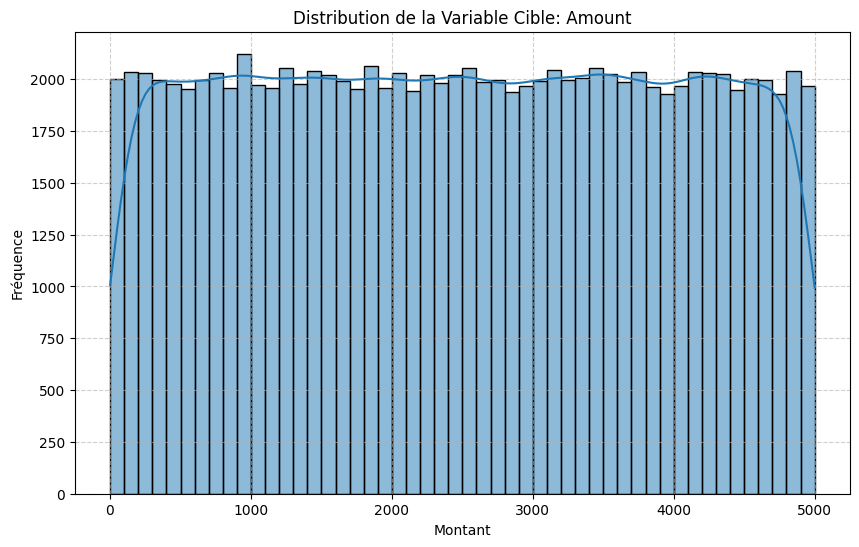

Histogramme de la distribution de 'Amount' généré.


In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title('Distribution de la Variable Cible: Amount')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Histogramme de la distribution de 'Amount' généré.")